In [4]:
# !pip install torch

In [5]:
import helper

In [6]:
import numpy as np
# Setting the random seed, feel free to change it and see different solutions.
x = np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b


# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines


## Soft max code

In [7]:
import numpy as np

# Write a function that takes as input a list of numbers, and returns
# the list of values given by the softmax function.
def softmax(L):
    expL = np.exp(L)
    sumExpL = sum(expL)
    result = []
    for i in expL:
        result.append(i*1.0/sumExpL)
    return result
    
    # Note: The function np.divide can also be used here, as follows:
    # def softmax(L):
    #     expL = np.exp(L)
    #     return np.divide (expL, expL.sum())

    pass

In [8]:
L = [1,2,4,5]
print(softmax(L))

[0.012754781742087938, 0.03467109143547885, 0.25618663962790716, 0.696387487194526]


## Cross Entropy

In [9]:
import numpy as np

# Write a function that takes as input two lists Y, P,
# and returns the float corresponding to their cross-entropy.

def cross_entropy(Y, P):
    Y = np.float_(Y)
    P = np.float_(P)
    return -np.sum(Y * np.log(P) + (1 - Y) * np.log(1 - P))

In [10]:
cross_entropy(1,0.2)

1.6094379124341003

## Gradient Descent 

In [11]:
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x, weights, bias)
    d_error = y - output
    weights += learnrate * d_error * x
    bias += learnrate * d_error
    return weights, bias

In [12]:
sigmoid(12)

0.9999938558253978

In [13]:
import torch

In [14]:
def activation(x):
    #sigmoig function
    return 1/(1+torch.exp(-x))

In [15]:
torch.manual_seed(7) ## Random data generation
features = torch.randn((1,5)) # five variables creating with normal values(r by c)

weights = torch.randn_like(features) ## random weights with the same shape as features, normal values

#creating bias
bias = torch.randn((1,1))

In [16]:
features,weights, bias

function = torch.sum(features* weights) +bias ## function for solving the equation

activation(function)

tensor([[0.1595]])

In [17]:
function = torch.sum(features* weights) +bias ## function for solving the equation

In [18]:
activation(function)

tensor([[0.1595]])

In [19]:
features.shape, weights.shape

(torch.Size([1, 5]), torch.Size([1, 5]))

##   Reshaping techniques
- tensor.reshape gives re shaped arrays but sometime clones the values 
- tensor.resize_() keep the data as it is, but if the given shape is not same as the previous one you will loose the data
- tensor.view() gives back the data
- best one is the tensor.view()


- Calculation of layers with matrix multiplication, torch.matmul and torch.mm

In [20]:
weights = weights.view(5,1)
y = torch.matmul(features, weights) +bias
y1 = torch.mm(features, weights) +bias
activation(y), activation(y1)

(tensor([[0.1595]]), tensor([[0.1595]]))

In [21]:
features1 = torch.randn((1,3)) # three variables creating with normal values(r by c)
n_input = features1.shape[1]


n_hidden = 2
n_output = 1

# weights with the shape of input and output 

w1 = torch.randn(n_input ,n_hidden) 
w2 = torch.randn(n_hidden,n_output ) # out put layer weight


#creating bias
b1 = torch.randn((1,n_hidden))
b2 = torch.randn((1,n_output))

In [22]:
h= activation(torch.mm(features1,w1) +b1)
output = activation(torch.mm(h,w2)+b2)
output

tensor([[0.8805]])

## Numpy to torch and back 

In [23]:
array = np.random.rand(4,3)
ar1 = torch.from_numpy(array)
ar1

tensor([[0.3745, 0.9507, 0.7320],
        [0.5987, 0.1560, 0.1560],
        [0.0581, 0.8662, 0.6011],
        [0.7081, 0.0206, 0.9699]], dtype=torch.float64)

In [24]:
ar1.numpy()

array([[0.37454012, 0.95071431, 0.73199394],
       [0.59865848, 0.15601864, 0.15599452],
       [0.05808361, 0.86617615, 0.60111501],
       [0.70807258, 0.02058449, 0.96990985]])

In [25]:
# multiply with two and in place
ar1.mul_(2)

tensor([[0.7491, 1.9014, 1.4640],
        [1.1973, 0.3120, 0.3120],
        [0.1162, 1.7324, 1.2022],
        [1.4161, 0.0412, 1.9398]], dtype=torch.float64)

## Neural Network with Py torch 

In [26]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

In [27]:
# The MNIST datasets are hosted on yann.lecun.com that has moved under CloudFlare protection
# Run this script to enable the datasets download
# Reference: https://github.com/pytorch/vision/issues/1938

from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [28]:
### Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [29]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


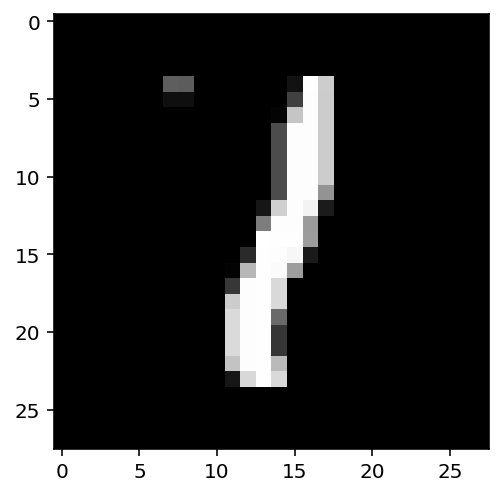

In [30]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');


In [31]:
# sigmoid images
def activation(x):
    #sigmoig function
    return 1/(1+torch.exp(-x))
# batch size taking all vaalues of elements. flattening the array 
inputs = images.view(images.shape[0], -1)

#parameters:
features1 = torch.randn((1,3)) # three variables creating with normal values(r by c)
n_input = features1.shape[1]

# weights with the shape of input and output 

w1 = torch.randn(784 ,256) 
w2 = torch.randn(256,10 ) # out put layer weight


#creating bias
b1 = torch.randn((256))
b2 = torch.randn((10))

h = activation(torch.mm(inputs, w1)+b1)


output = torch.mm(h,w2)+b2
output

tensor([[-2.3793e+01,  2.0824e+00,  4.5468e+00, -2.7246e+00,  1.0188e+01,
          6.6057e+00, -4.2441e+00,  6.3053e+00, -2.6993e+00, -1.5374e+01],
        [-1.6181e+01, -2.3967e+00,  4.6947e+00, -9.6828e+00,  1.3922e+01,
          7.3780e+00,  8.6824e+00,  1.4682e+01, -2.8522e+00, -5.1972e+00],
        [-2.1124e+01,  1.4897e+01,  1.3860e+00, -1.5341e+01,  5.1440e+00,
          1.0925e+01, -3.2781e+00,  1.2804e+01, -4.4876e+00, -3.9403e+00],
        [-6.9418e+00,  9.0191e+00,  3.4653e+00, -1.4259e+01,  1.8231e+00,
          8.7189e+00,  3.7324e+00,  7.2898e+00, -2.3497e+00, -1.2867e+01],
        [-1.9588e+01,  1.2238e+01,  2.8656e+00,  1.4609e+00,  2.4866e+00,
          1.1231e+01,  2.3946e+00,  1.6902e+01,  2.8385e+00, -8.3979e+00],
        [-2.7152e+01, -8.9810e-01, -2.2499e-02, -1.8021e+01, -4.8907e-01,
          1.2049e+01,  8.0524e+00,  8.9564e+00, -1.1118e+00, -1.3605e+01],
        [-2.1683e+01,  8.6108e+00, -2.1247e+00, -1.0190e+01,  8.6081e+00,
          8.8144e+00,  3.4306e+0

In [32]:
def softmax(x):
    # dim = 1 , sum accross the columns
    return torch.exp(x)/ torch.sum(torch.exp(x), dim = 1).view(-1,1)

# Here, out should be the output of the network in the previous excercise with shape (64,10)
probabilities = softmax(output)

# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [33]:
from torch import nn
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [34]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [35]:
from torch import nn
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 128)
        self.hidden = nn.Linear(128, 64)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(64, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.relu()
        self.sigmoid = nn.relu()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.relu(x)        
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [36]:
# Grab some data 
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]


In [37]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


## Training Neural Network

In [38]:
# The MNIST datasets are hosted on yann.lecun.com that has moved under CloudFlare protection
# Run this script to enable the datasets download
# Reference: https://github.com/pytorch/vision/issues/1938

from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [39]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


In [40]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10))

# Define the loss
criterion = nn.CrossEntropyLoss()

# Get our data
dataiter = iter(trainloader)

images, labels = next(dataiter)

# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

tensor(2.3120, grad_fn=<NllLossBackward0>)


In [41]:
## Solution

# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

# Define the loss
criterion = nn.NLLLoss()

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our log-probabilities
logps = model(images)
# Calculate the loss with the logps and the labels
loss = criterion(logps, labels)

print(loss)

tensor(2.3055, grad_fn=<NllLossBackward0>)


- Exercise: Build a model that returns the log-softmax as the output and calculate the loss using the negative log likelihood loss.

In [42]:
## Solution

# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

# Define the loss
criterion = nn.NLLLoss()

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our log-probabilities
logps = model(images)
# Calculate the loss with the logps and the labels
loss = criterion(logps, labels)

print(loss)

tensor(2.3280, grad_fn=<NllLossBackward0>)


## Autograd

In [43]:
x = torch.randn(2,2, requires_grad = True)

In [44]:
y = x**2
print(y.grad_fn)

In [45]:
z = y.mean()
print(z)

tensor(0.8275, grad_fn=<MeanBackward0>)


In [46]:
print(x.grad)

None


In [47]:
z.backward()
print(x.grad)
print(x/2)

tensor([[ 0.4396, -0.1170],
        [ 0.7747,  0.1429]])
tensor([[ 0.4396, -0.1170],
        [ 0.7747,  0.1429]], grad_fn=<DivBackward0>)


## Loss and Autograd together

In [48]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

In [49]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)


Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0011,  0.0011,  0.0011,  ...,  0.0011,  0.0011,  0.0011],
        [-0.0024, -0.0024, -0.0024,  ..., -0.0024, -0.0024, -0.0024],
        [ 0.0032,  0.0032,  0.0032,  ...,  0.0032,  0.0032,  0.0032],
        ...,
        [-0.0004, -0.0004, -0.0004,  ..., -0.0004, -0.0004, -0.0004],
        [ 0.0006,  0.0006,  0.0006,  ...,  0.0006,  0.0006,  0.0006],
        [ 0.0010,  0.0010,  0.0010,  ...,  0.0010,  0.0010,  0.0010]])


## Training the network

In [50]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [51]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[-0.0315,  0.0102,  0.0103,  ...,  0.0069,  0.0087, -0.0176],
        [ 0.0084, -0.0258, -0.0281,  ..., -0.0036,  0.0103,  0.0313],
        [ 0.0140,  0.0226,  0.0179,  ..., -0.0054,  0.0221, -0.0220],
        ...,
        [ 0.0103,  0.0321, -0.0129,  ..., -0.0332,  0.0354,  0.0009],
        [-0.0117, -0.0044, -0.0174,  ..., -0.0015, -0.0172, -0.0221],
        [ 0.0136,  0.0149, -0.0242,  ..., -0.0210, -0.0223,  0.0136]],
       requires_grad=True)
Gradient - tensor([[ 0.0014,  0.0014,  0.0014,  ...,  0.0014,  0.0014,  0.0014],
        [-0.0010, -0.0010, -0.0010,  ..., -0.0010, -0.0010, -0.0010],
        [-0.0020, -0.0020, -0.0020,  ..., -0.0020, -0.0020, -0.0020],
        ...,
        [-0.0007, -0.0007, -0.0007,  ..., -0.0007, -0.0007, -0.0007],
        [-0.0010, -0.0010, -0.0010,  ..., -0.0010, -0.0010, -0.0010],
        [ 0.0015,  0.0015,  0.0015,  ...,  0.0015,  0.0015,  0.0015]])


In [52]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[-0.0315,  0.0102,  0.0103,  ...,  0.0069,  0.0087, -0.0176],
        [ 0.0085, -0.0257, -0.0281,  ..., -0.0036,  0.0104,  0.0313],
        [ 0.0140,  0.0226,  0.0179,  ..., -0.0054,  0.0221, -0.0220],
        ...,
        [ 0.0103,  0.0321, -0.0129,  ..., -0.0332,  0.0354,  0.0009],
        [-0.0117, -0.0044, -0.0174,  ..., -0.0015, -0.0172, -0.0221],
        [ 0.0136,  0.0149, -0.0242,  ..., -0.0210, -0.0223,  0.0136]],
       requires_grad=True)


### Exercise: Implement the training pass for our network. If you implemented it correctly, you should see the training loss drop with each epoch.

In [53]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.891716837120463
Training loss: 0.8333756375287388
Training loss: 0.5195011826498168
Training loss: 0.4257844111431382
Training loss: 0.3814908924228601


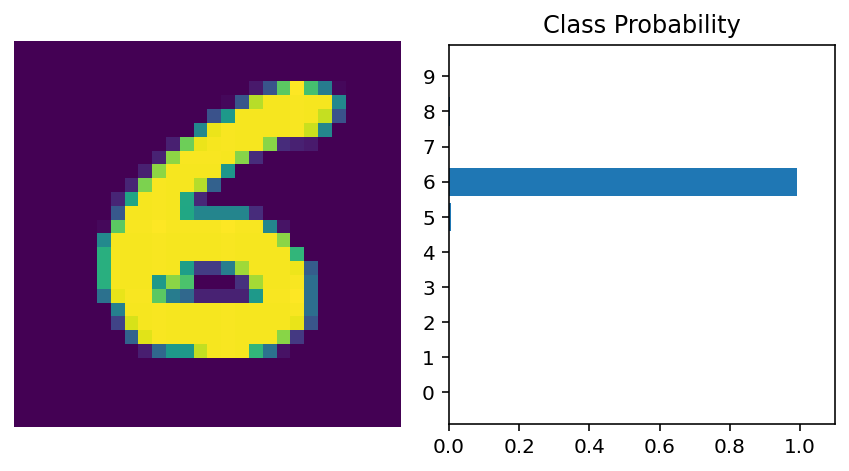

In [69]:
%matplotlib inline

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logits = model.forward(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = F.softmax(logits, dim = 1)
helper.view_classify(img.view(1, 28, 28), ps)